In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import os

In [4]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'FBDv2.py',
 'FBDv3.py',
 'FB_Dashboard.py',
 'FB_Dashboard2.py',
 'Player Data1.xlsx',
 'Player Data2.xlsx',
 'README.md',
 'requirements.txt',
 'TopDashboardPlot.ipynb',
 'trial.py',
 'Untitled.ipynb',
 '~$Player Data2.xlsx']

In [6]:
xl=pd.ExcelFile('Player Data2.xlsx')

In [8]:
sheets=xl.sheet_names
sheets

['Upper Text',
 'TSP Card',
 'Upper Left Radar',
 'Upper Right Radar',
 'Middle Text',
 'Lower Left Radar',
 'Lower Right Radar',
 'Dashboard']

In [94]:
tdf=pd.read_excel('Player Data2.xlsx',sheet_name='Upper Text')
tdf

,Position,Reference,Primary Attributes,Secondary Attributes,Boosted Attributes,Discounted Attributes
0,Left Wing,Ideal Player,Attacking,Shooting,Coming Soon,Coming Soon
1,NaN,NaN,Passing,Defense,NaN,NaN
2,NaN,NaN,Pass Types,Misc,NaN,NaN
3,NaN,NaN,Goal CAs,NaN,NaN,NaN
4,NaN,NaN,Shot Cas,NaN,NaN,NaN
5,NaN,NaN,Possession,NaN,NaN,NaN


In [103]:
mdf=pd.read_excel('Player Data2.xlsx',sheet_name='Middle Text')
mdf['Contract']=mdf['Contract'].astype(str)
mdf
mdf['TSP Score']=(mdf['TSP Score']*100).round(0).astype(str)
mdf

,Player,Age,Preferred Feet,Club,Contract,TSP Score
0,Andreas S Olsen,24.0,Left,Club Brugge,2026-06-30,85.0
1,Antonio Nusa,18.0,Right,Club Brugge,2027-06-30,83.0
2,Jack Clarke,23.0,Right,Sunderland,2026-06-30,81.0
3,Désiré Doué,18.0,Both,Stade Rennais,2026-06-30,80.0
4,Fabian Reese,26.0,Right,Hertha,2028-06-01,77.0
5,Bruma,29.0,Right,SC Braga,2027-06-01,57.0
6,Philip Zinckernagel,29.0,Right,Club Brugge,2025-06-01,71.0
7,Baris Atik,29.0,Right,Magdeburg,2025-06-30,58.0
8,Gaëtan Perrin,27.0,Right,Auxerre,2024-06-01,62.0
9,Ideal Left Winger,NaN,NaN,NaN,NaT,100.0


In [105]:
mdf.drop(9)

,Player,Age,Preferred Feet,Club,Contract,TSP Score
0,Andreas S Olsen,24.0,Left,Club Brugge,2026-06-30,85.0
1,Antonio Nusa,18.0,Right,Club Brugge,2027-06-30,83.0
2,Jack Clarke,23.0,Right,Sunderland,2026-06-30,81.0
3,Désiré Doué,18.0,Both,Stade Rennais,2026-06-30,80.0
4,Fabian Reese,26.0,Right,Hertha,2028-06-01,77.0
5,Bruma,29.0,Right,SC Braga,2027-06-01,57.0
6,Philip Zinckernagel,29.0,Right,Club Brugge,2025-06-01,71.0
7,Baris Atik,29.0,Right,Magdeburg,2025-06-30,58.0
8,Gaëtan Perrin,27.0,Right,Auxerre,2024-06-01,62.0


In [93]:
t1=tdf.columns[0]
t2=tdf.iloc[0,0]
t3=tdf.columns[1]
t4=tdf.iloc[0,1]
t5='Score'
t6='100'
#top_row=['t'+str(i) for i in range(1,6)]
top_row=[t1,t2,t3,t4,t5,t6]

second_row=tdf['Primary Attributes'].tolist()
second_row.insert(0,tdf.columns[2])

third_row=tdf[tdf.columns[3]].tolist()
third_row.insert(0,tdf.columns[3])

fourth_row=[tdf.columns[4],tdf.iloc[0,4],tdf.columns[5],tdf.iloc[0,5]]

plot_rows=[fourth_row,third_row,second_row,top_row]

values=[]
for i in plot_rows:
    l=[round(100/len(i),2) for j in range(len(i))]
    values.append(l)

# Normalize the values to represent percentages
normalized_values = []
for student_values in values:
    total = sum(student_values)
    percentages = [value / total * 100 for value in student_values]
    normalized_values.append(percentages)

# Define colors for each attribute
#colors = ['#636EFA', '#EF553B', '#00CC96','#112277','#225577','#004488','#2266AA']
colors=[['grey','white','grey','white','grey','white'],['blue','yellow','yellow','yellow','yellow','yellow','yellow'],
        ['blue','yellow','yellow','yellow','yellow','yellow','yellow'],['grey','white','grey','white','grey','white']]
# Create the figure
fig = go.Figure()

# Add the bar trace for each student
for i, bar_values in zip(range(4), normalized_values):
    
    for bar, percentage, color in zip(plot_rows[i], bar_values, colors[i]):
        
        fig.add_trace(go.Bar(
            y=[i],  # Single bar for each row
            x=[percentage],  # The width of the segment
            name=bar,
            orientation='h',
            text=f"{bar}",#: {percentage:.1f}%",  # Text inside the bar
            textposition='inside',
            insidetextanchor='middle',  # Center-align the text inside the bars
            marker=dict(color=color),  # Set the color for each segment
            hoverinfo='none'
        ))

# Update layout
fig.update_layout(
    #title='Comparison of Students\' Performance Across Attributes',
    #xaxis_title='Percentage',
    #yaxis_title='',
    barmode='stack',
    xaxis=dict(range=[0, 100]),  # Ensure the x-axis ranges from 0 to 100
    showlegend=False
)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showline=False, showticklabels=False,linecolor='white')
config ={'displayModeBar': False}

# Display the chart
fig.show()



In [56]:
t1=tdf.columns[0]
t2=tdf.iloc[0,0]
t3=tdf.columns[1]
t4=tdf.iloc[0,1]
t5='Score'
t6='100'
#top_row=['t'+str(i) for i in range(1,6)]
top_row=[t1,t2,t3,t4,t5,t6]
=top_row

['Position', 'Left Wing', 'Reference', 'Ideal Player', 'Score', '100']

In [57]:
second_row=tdf['Primary Attributes'].tolist()
second_row.insert(0,tdf.columns[2])

second_row

['Primary Attributes',
 'Attacking',
 'Passing',
 'Pass Types',
 'Goal CAs',
 'Shot Cas',
 'Possession']

In [29]:
third_row=tdf[tdf.columns[3]].tolist()
third_row.insert(0,tdf.columns[3])
third_row

['Secondary Attributes', 'Shooting', 'Defense', 'Misc', nan, nan, nan]

In [32]:
fourth_row=[tdf.columns[4],tdf.iloc[0,4],tdf.columns[5],tdf.iloc[0,5]]
fourth_row

['Boosted Attributes', 'Coming Soon', 'Discounted Attributes', 'Coming Soon']

In [80]:
plot_rows=[top_row,second_row,third_row,fourth_row]


AttributeError: 'list' object has no attribute 'reversed'

In [50]:
values=[]
for i in plot_rows:
    l=[round(100/len(i),2) for j in range(len(i))]
    values.append(l)
#values.round(3)
values

[[16.67, 16.67, 16.67, 16.67, 16.67, 16.67],
 [14.29, 14.29, 14.29, 14.29, 14.29, 14.29, 14.29],
 [14.29, 14.29, 14.29, 14.29, 14.29, 14.29, 14.29],
 [25.0, 25.0, 25.0, 25.0]]

In [ ]:
values = [
    [100/len(top_row) for  i in range len(top_row)],  # row 1
    [25, 40, 35],  # Student 2
    [20, 60, 20],  # Student 3
    [35, 45, 20]   # Student 4
]

# Normalize the values to represent percentages
normalized_values = []
for student_values in values:
    total = sum(student_values)
    percentages = [value / total * 100 for value in student_values]
    normalized_values.append(percentages)
normalized_values

In [87]:
# Normalize the values to represent percentages
normalized_values = []
for student_values in values:
    total = sum(student_values)
    percentages = [value / total * 100 for value in student_values]
    normalized_values.append(percentages)

# Define colors for each attribute
colors = ['#636EFA', '#EF553B', '#00CC96','#112277','#225577','#004488','#2266AA']

# Create the figure
fig = go.Figure()

# Add the bar trace for each student
for student, student_values,i in zip(students, normalized_values,range(4)):
    for attribute, percentage, color in zip(attributes[i], student_values, colors):
        fig.add_trace(go.Bar(
            y=[student],  # Single bar for each student
            x=[percentage],  # The width of the segment
            name=attribute,
            orientation='h',
            text=f"{attribute}",#: {percentage:.1f}%",  # Text inside the bar
            textposition='inside',
            insidetextanchor='middle',  # Center-align the text inside the bars
            marker=dict(color=color),  # Set the color for each segment
            hoverinfo='none'
        ))

# Update layout
fig.update_layout(
    #title='Comparison of Students\' Performance Across Attributes',
    #xaxis_title='Percentage',
    #yaxis_title='',
    barmode='stack',
    xaxis=dict(range=[0, 100]),  # Ensure the x-axis ranges from 0 to 100
    showlegend=False
)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showline=False, showticklabels=False,linecolor='white')
config ={'displayModeBar': False}

# Display the chart
fig.show()


In [39]:
values = [
    [],  # row 1
    [25, 40, 35],  # Student 2
    [20, 60, 20],  # Student 3
    [35, 45, 20]   # Student 4
]

# Normalize the values to represent percentages
normalized_values = []
for student_values in values:
    total = sum(student_values)
    percentages = [value / total * 100 for value in student_values]
    normalized_values.append(percentages)
normalized_values

[[30.0, 20.0, 20.0, 30.0],
 [25.0, 40.0, 35.0],
 [20.0, 60.0, 20.0],
 [35.0, 45.0, 20.0]]

In [60]:
attributes=plot_rows

In [72]:
for student, student_values,i in zip(students, normalized_values,range(len(students))):
    print('Outer Loop 1')
    print(student,student_values)
    innercount=0
    for attribute, percentage, color in zip(attributes[i], student_values, colors):
        #print( 'Inner Loop  2')
        print('the inner loop count is',innercount )
        innercount+=1
        print(attribute,percentage,color)
        
        fig.add_trace(go.Bar(
            y=[student],  # Single bar for each student
            x=[percentage],  # The width of the segment
            #name=attribute,
            orientation='h',
            text=f"{attribute}: {percentage:.1f}%",  # Text inside the bar
            textposition='inside',
            insidetextanchor='middle',  # Center-align the text inside the bars
            marker=dict(color=color)  # Set the color for each segment
        ))


Outer Loop 1
Student 1 [16.666666666666664, 16.666666666666664, 16.666666666666664, 16.666666666666664, 16.666666666666664, 16.666666666666664]
the inner loop count is 0
Position 16.666666666666664 #636EFA
the inner loop count is 1
Left Wing 16.666666666666664 #EF553B
the inner loop count is 2
Reference 16.666666666666664 #00CC96
the inner loop count is 3
Ideal Player 16.666666666666664 #112277
the inner loop count is 4
Score 16.666666666666664 #225577
the inner loop count is 5
100 16.666666666666664 #004488
Outer Loop 1
Student 2 [14.285714285714288, 14.285714285714288, 14.285714285714288, 14.285714285714288, 14.285714285714288, 14.285714285714288, 14.285714285714288]
the inner loop count is 0
Primary Attributes 14.285714285714288 #636EFA
the inner loop count is 1
Attacking 14.285714285714288 #EF553B
the inner loop count is 2
Passing 14.285714285714288 #00CC96
the inner loop count is 3
Pass Types 14.285714285714288 #112277
the inner loop count is 4
Goal CAs 14.285714285714288 #225577


In [74]:
# Sample data
students = ['Student 1', 'Student 2', 'Student 3', 'Student 4']
"""
#attributes = ['Attribute 1', 'Attribute 2', 'Attribute 3']
values = [
    [30, 50, 20],  # Student 1
    [25, 40, 35],  # Student 2
    [20, 60, 20],  # Student 3
    [35, 45, 20]   # Student 4
]
"""
# Normalize the values to represent percentages
normalized_values = []
for student_values in values:
    total = sum(student_values)
    percentages = [value / total * 100 for value in student_values]
    normalized_values.append(percentages)

# Define colors for each attribute
#colors = ['#636EFA', '#EF553B', '#00CC96']
colors = ['#636EFA', '#EF553B', '#00CC96','#112277','#225577','#004488','#2266AA']

# Create the figure
fig = go.Figure()

# Add the bar trace for each student
for student, student_values ,i in zip(students, normalized_values, range(len(students))):
    for attribute, percentage, color in zip(attributes[i], student_values, colors):
        fig.add_trace(go.Bar(
            y=[student],  # Single bar for each student
            x=[percentage],  # The width of the segment
            name=attribute,
            orientation='h',
            text=f"{attribute}: {percentage:.1f}%",  # Text inside the bar
            textposition='inside',
            insidetextanchor='middle',  # Center-align the text inside the bars
            marker=dict(color=color)  # Set the color for each segment
        ))

# Update layout
fig.update_layout(
    title='Comparison of Students\' Performance Across Attributes',
    xaxis_title='Percentage',
    yaxis_title='',
    barmode='stack',
    xaxis=dict(range=[0, 100]),  # Ensure the x-axis ranges from 0 to 100
    showlegend=True
)

# Display the chart
fig.show()


TypeError: 'NoneType' object is not iterable

In [1]:
Player=['Jack Clarke','Bruma','Philip Zinckernagel','Andreas S Olsen','Gaëtan Perrin',
        'Baris Atik','Fabian Reese','Désiré Doué','Antonio Nusa']

players=[x.replace(' ', '_') for x in Player]
players

['Jack_Clarke',
 'Bruma',
 'Philip_Zinckernagel',
 'Andreas_S_Olsen',
 'Gaëtan_Perrin',
 'Baris_Atik',
 'Fabian_Reese',
 'Désiré_Doué',
 'Antonio_Nusa']

In [3]:
players=[x+'.Jpeg' for x in players]
players

['Jack_Clarke.Jpeg',
 'Bruma.Jpeg',
 'Philip_Zinckernagel.Jpeg',
 'Andreas_S_Olsen.Jpeg',
 'Gaëtan_Perrin.Jpeg',
 'Baris_Atik.Jpeg',
 'Fabian_Reese.Jpeg',
 'Désiré_Doué.Jpeg',
 'Antonio_Nusa.Jpeg']

In [4]:
from pil import image as img

ModuleNotFoundError: No module named 'pil'

In [13]:
from IPython.display import display, Image

# Read the image data from a file
with open('player_images/Bruma', 'rb') as file:
    image_data = file.read()

# Display the image
display(Image(data=image_data))


FileNotFoundError: [Errno 2] No such file or directory: 'player_images/Bruma'

In [8]:
import os
os.getcwd()

'C:\\Users\\senth\\Documents\\GitHub\\Pandas_practice'

In [10]:
os.listdir()


['.git',
 '.ipynb_checkpoints',
 'FBDv2.py',
 'FBDv3.py',
 'FB_Dashboard.py',
 'FB_Dashboard2.py',
 'newsample.py',
 'Player Data1.xlsx',
 'Player Data2.xlsx',
 'player_images',
 'README.md',
 'requirements.txt',
 'TopDashboardPlot.ipynb',
 'trial.py',
 'Untitled.ipynb',
 'Untitled1.ipynb']

['Andreas_S_Olsen.jpg', 'Antonio_Nusa.jpg', 'Baris_Atik.jpg', 'Bruma.jpg', 'Désiré_Doué.jpg', 'Fabian_Reese.jpg', 'Gaëtan_Perrin.jpg', 'Jack _Clarke.jpg', 'Philip_Zinckernagel.jpg']


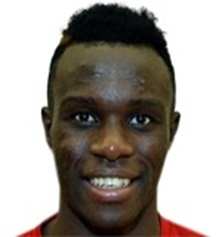

In [16]:
image_directory = 'player_images'
image_files = os.listdir(image_directory)
print(image_files)

# Ensure the image file exists
image_name = 'Bruma.jpg'
if image_name in image_files:
    image_path = os.path.join(image_directory, image_name)
    display(Image(filename=image_path))
else:
    print(f'File {image_name} not found in {image_directory}')

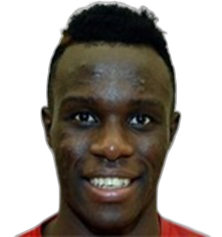

In [7]:
from rembg import remove
from PIL import Image

input_path = 'player_images/Bruma.jpg'
#output_path = 'path/to/save/output/image.png'

input_image = Image.open(input_path)
output_image = remove(input_image)
output_image.save('player_images/Bruma.png')
display(output_image)

def remove_bg(player):
    input_path = 'player_images/'+ player +'.jpg'
    input_image = Image.open(file)
    output_image = remove(input_image)
    output_image.save('player_images/'+player+'.png')


In [46]:
def remove_bg(player):
    input_path = 'player_images/'+ player 
    
    input_image = Image.open(input_path)
    output_image = remove(input_image)
    player=player.split('.')[0]
    output_path='player_images/'+player+'.png'
    print(output_path)
    output_image.save(output_path)
    display(output_image)

playerlist=['Andreas_S_Olsen.jpg', 'Antonio_Nusa.jpg', 'Baris_Atik.jpg',  'Désiré_Doué.jpg', 'Fabian_Reese.jpg',
  'Gaëtan_Perrin.jpg', 'Jack _Clarke.jpg', 'Philip_Zinckernagel.jpg']   

In [37]:
import os
os.getcwd()

'C:\\Users\\senth\\Documents\\GitHub\\Pandas_practice'

In [40]:
os.listdir('player_images')

['Andreas_S_Olsen.png',
 'Antonio_Nusa.png',
 'Baris_Atik.png',
 'Désiré_Doué.png',
 'Fabian_Reese.png',
 'Gaëtan_Perrin.png',
 'Jack _Clarke.png',
 'New folder',
 'Philip_Zinckernagel.png',
 'SmartScoutlogo.webp']

In [43]:
input_image = Image.open('player_images/Jack_Clarke.png')
display(input_image)

FileNotFoundError: [Errno 2] No such file or directory: 'player_images/Jack_Clarke.png'

player_images/SmartScoutlogo.png


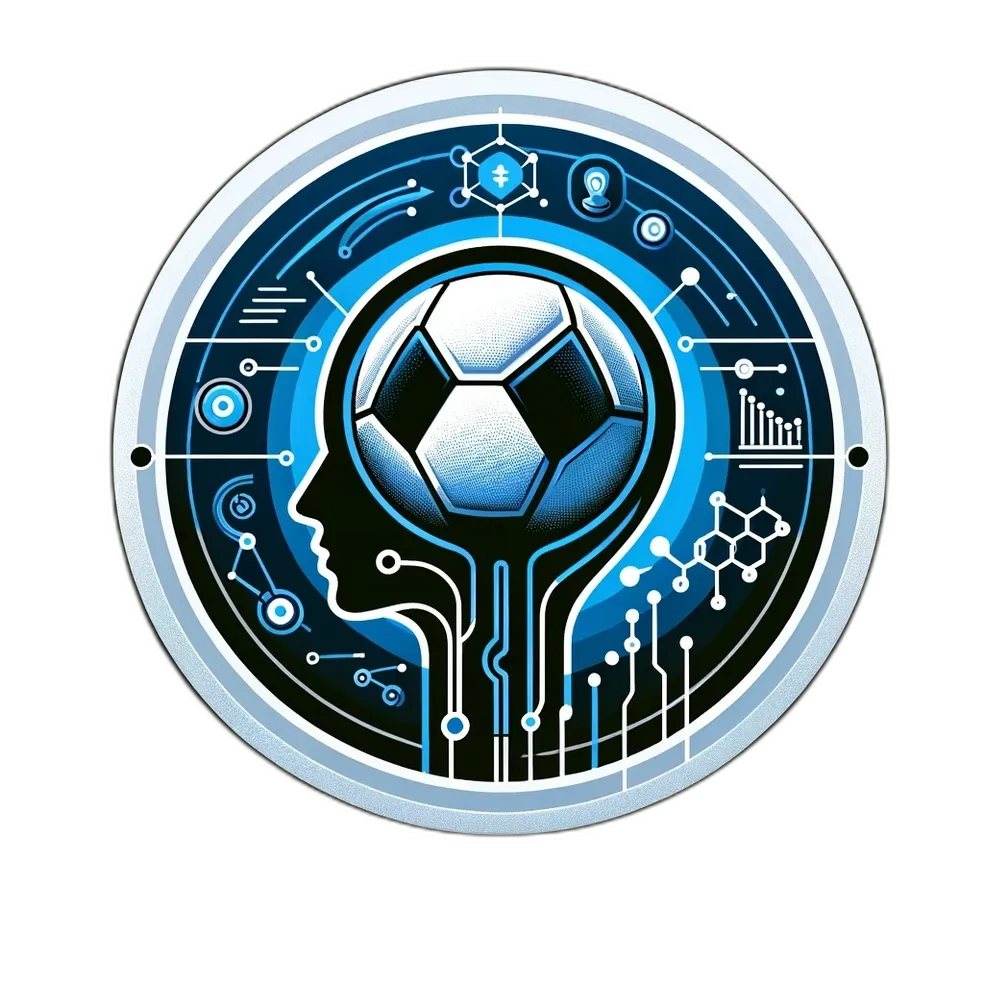

In [47]:
remove_bg('SmartScoutlogo.webp')

player_images/Andreas_S_Olsen.png


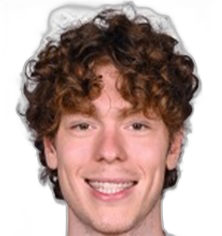

player_images/Antonio_Nusa.png


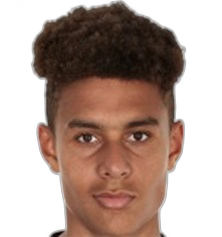

player_images/Baris_Atik.png


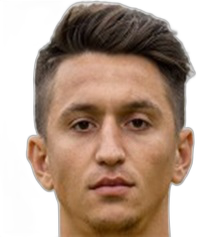

player_images/Désiré_Doué.png


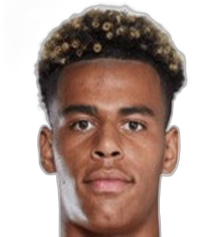

player_images/Fabian_Reese.png


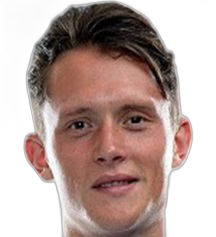

player_images/Gaëtan_Perrin.png


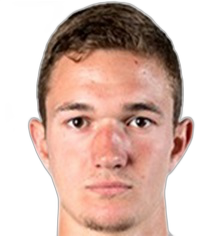

player_images/Jack _Clarke.png


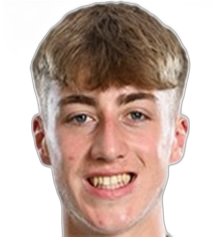

player_images/Philip_Zinckernagel.png


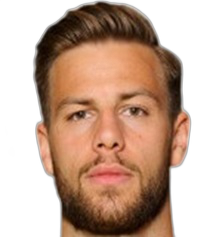

In [33]:
for p in playerlist:
    remove_bg(p)

In [20]:
pip install --upgrade pooch

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 64.6/64.6 kB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
#pip install rembg

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 38.8/38.8 MB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 53.0/53.0 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
